## USDA FOOD Database Analysis

In [47]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
db = json.load(open('database.json'))

In [4]:
len(db)

6636

In [5]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [7]:
nutrient_df = pd.DataFrame(db[0]['nutrients'])

In [8]:
nutrient_df.head()

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [9]:
info_keys =['description','group','id', 'manufacturer']

In [10]:
info = pd.DataFrame(db, columns= info_keys)

In [11]:
info.head(5)

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [12]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [13]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [24]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)
nutrient_df = pd.concat(nutrients, ignore_index= True)

In [25]:
nutrient_df

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [26]:
#check for duplicated values
nutrient_df.duplicated().sum()

14179

In [27]:
nutrient_df = nutrient_df.drop_duplicates()

In [28]:
#rename the column names
col_mapping = {'description':'food',
              'group':'fgroup'}

In [29]:
info = info.rename(columns=col_mapping, copy= False)

In [30]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [31]:
col_mapping = {'description':'nutrient',
              'group':'nutrgroup'} 

In [32]:
nutrient_df = nutrient_df.rename(columns= col_mapping, copy=False)

In [33]:
nutrient_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   value      375176 non-null  float64
 1   units      375176 non-null  object 
 2   nutrient   375176 non-null  object 
 3   nutrgroup  375176 non-null  object 
 4   id         375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [34]:
#merge the info and nutrient dataframes
ndata = pd.merge(nutrient_df, info, on= 'id', how='outer')
ndata.info()

,value,units,nutrient,nutrgroup,id,food,fgroup,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [35]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutrgroup     375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [41]:
ndata.iloc[3000]

value                               0.0
units                                 g
nutrient                 Alcohol, ethyl
nutrgroup                         Other
id                                 1159
food            Cheese, goat, soft type
fgroup           Dairy and Egg Products
manufacturer                           
Name: 3000, dtype: object

In [48]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [49]:
#Plot the median zinc value by nutrient group
result = ndata.groupby(["nutrient","fgroup"])['value'].quantile(0.5)

<Axes: ylabel='fgroup'>

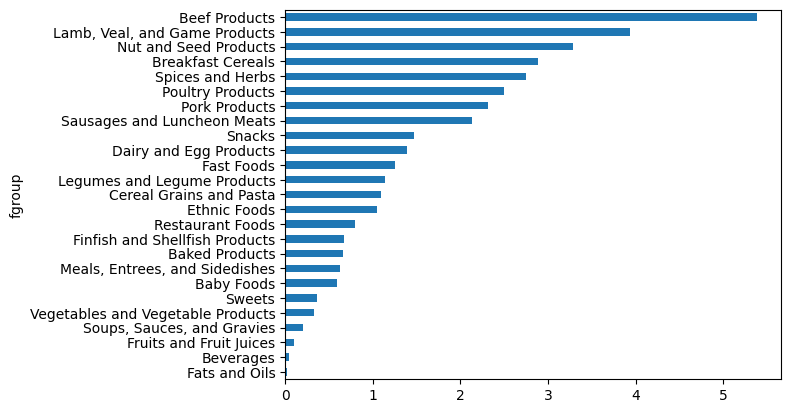

In [52]:
result["Zinc, Zn"].sort_values().plot(kind="barh")